WITH PHYSICS...

In [1]:
# Import libraries
import numpy as np
from scipy.constants import G # G=6.67408e-11, gravitational constant
import matplotlib.pyplot as plt

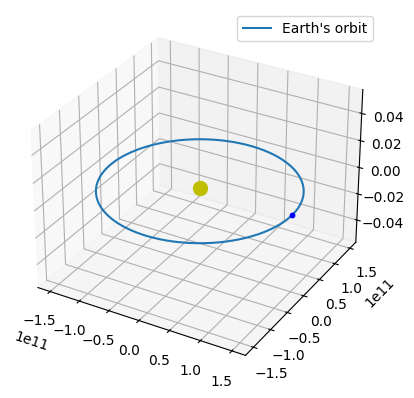

In [2]:
# Define constants of orbiting bodies (Sun and Earth) needed (SI units, m, kg, m/s)
m_sun = 1.98910e30
m_earth = 5.97237e24
rad_sun = 6.955e8
rad_earth = 6.371e6

# Define initial conditions
pos_sun = np.array([0.0, 0.0, 0.0])         # sun hardcoded to be at center of the coordinate system
pos_earth = np.array([1.496e11, 0.0, 0.0])  # 1 AU from sun
vel_earth = np.array([0.0, 2.978e4, 0.0])   # orbital speed of Earth (initial tangential velocity)

# Initial force & acceleration experienced by Earth
f_sunonearth = -G * m_earth * m_sun * (pos_earth-pos_sun) / (np.linalg.norm(pos_earth-pos_sun)**3) # "f_ES"
acc_earthfromsun = f_sunonearth / m_earth   #acc_12 = acceleration of object 1 due to object 2

# Update velocity & position by Euler's method
def update_pos_vel(pos, vel, acc):          # we want it to update every 1 day in simulation
    dt = 24*60*60                           # 1 day in seconds (because velocity is in m/s)
    vel += acc * dt
    pos += vel * dt
    return pos

# Simulate Earth's orbit
t = 365                                     # number of days to simulate (how many times to update position)
earth_poshistory = np.zeros((t, 3))
 
for n in range(0, t):
    earth_poshistory[n] = update_pos_vel(pos_earth, vel_earth, acc_earthfromsun)

    # Update force & acceleration based on new position
    f_sunonearth = -G*m_earth*m_sun * (earth_poshistory[n]-pos_sun) / (np.linalg.norm(earth_poshistory[n]-pos_sun)**3)
    acc_earthfromsun = f_sunonearth /m_earth

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(pos_sun[0], pos_sun[1], pos_sun[2], color="y", s=100)            # sun
ax.scatter(pos_earth[0], pos_earth[1], pos_earth[2], color="b", s=10)       # earth
ax.plot(earth_poshistory[:, 0], earth_poshistory[:, 1], earth_poshistory[:, 2], label="Earth's orbit")

ax.legend()
plt.show()

In [3]:
# define position of the orbiting body relative to what it's orbiting
# generalise for any star-planet system
# not hardcode star's position
# add moon or satellite (3rd body)
# include gravitational influence of other bodies existing in the system
# make constants (mass, velocity) relative to each other to make simulation more useful... since it's not accurate anyways
# explain why dist_earth_sun != mag(pos_earth-pos_sun)
# incorporate the idea of orbits being elliptical - there are 2 foci